Для работы был выбран шестой датасет из списка под названием «6 games». В данном датасете представлена информация о видеоиграх: названии, платформе, годе выпуска, жанре, продажах в разных регионах и оценках. Чтобы начать работу, импортируем библиотеку, а затем считываем CSV файл.Выведем первые 20 строк с помощью метода head.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("6games.csv")

#2
print(df.head(20))

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

Как уже было сказано, данная таблица содержит информацию о выпущенных играх. Предметная область – консольные игры и их продажи. 
Опишем колонки подробнее:
Name – Название игры или серии игр и части
Platform - платформа, на которую игра выпущена (различные виды консолей)
Year_of_Realease – год выпуска  игры
Genre – жанр игры (шутер, рпг, симулятор и т.д.)
NA/EU/JP/Other_Sales – пробег авто
Critic/User_Score – тип топлива (бензин, дизель, углеводородный или 
компримированный газ, электричество)
Rating – кто продаёт машину (собственник или салон)
    Теперь с помощью метода «.info» оценим данные. Этот метод 
возвращает название столбцов, типы данных, количество ненулевых 
объектов каждом столбце.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь выведем названия столбцов с помощью df.columns. Названия всех колонк приемлимы.

In [47]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Найдём пропуски и устраним их. При помощи метода «isna» найдём все пропуски в таблице, а также при помощи sum выведем количество 
пропусков в каждом столбце. Как мы можем увидеть присутствуют пропуски в столбцах названия, жанра, года выпуска, оценок и рейтинга. Так как важным столбцом является лишь название, строки без  информации в нём не имеют смысла, поэтому их стоит удалить при помощи метода «dropna». Однако можно не удалять строки без данных в дргугих столбцах. Поэтому при помощи метода fillna заполним пустые значения оценок нулями, жанра и рейтинга строкой 'none', а года выпуска 1950 годом, в котором ещё не выпускались игры Проверяем пропуски еще раз и их больше нет. 

In [48]:
print(df.isna())
print(df.isna().sum())
df = df.dropna(subset=['Name'])
df['Genre'] = df['Genre'].fillna('none')
df['Year_of_Release'] = df['Year_of_Release'].fillna(1950)
df['Rating'] = df['Rating'].fillna('none')
tmp_df = df
df['Critic_Score'] = df['Critic_Score'].fillna(0)
df['User_Score'] = df['User_Score'].fillna(0)

print(df.isna().sum())

        Name  Platform  Year_of_Release  Genre  NA_sales  EU_sales  JP_sales  \
0      False     False            False  False     False     False     False   
1      False     False            False  False     False     False     False   
2      False     False            False  False     False     False     False   
3      False     False            False  False     False     False     False   
4      False     False            False  False     False     False     False   
...      ...       ...              ...    ...       ...       ...       ...   
16710  False     False            False  False     False     False     False   
16711  False     False            False  False     False     False     False   
16712  False     False            False  False     False     False     False   
16713  False     False            False  False     False     False     False   
16714  False     False            False  False     False     False     False   

       Other_sales  Critic_Score  User_

Проверим данные на наличие дубликатов. Полностью повторяющихся строк нет. Уникальным значением в данном наборе является название, а точнее название, платформа и год выпуска, только в таком сочетании строка уникальна. Получается составной перивчный ключ. Уникальных значений по имени 11559. При помощи метода drop_duplicates удаляем дубликаты по столбцам Названия, платформы и года. После переиндексации и вывода ифнормации видим, что на одну запись стало меньше. В записях остальных колонок ошибок нет.

In [49]:
print("Количество дубликатов: " + str(df.duplicated().sum()))
df.info()

print(df['Name'].nunique(), "\n")
df = df.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release']).reset_index()
df.info()
print( "\n")
print(df['Year_of_Release'].unique())
print(df['Platform'].unique())
print(df['Genre'].unique())
print(df['Rating'].unique())

Количесвто дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     16713 non-null  float64
 9   User_Score       16713 non-null  object 
 10  Rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
11559 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   in

Проверим все ли типы данных соответствуют действительности. Все столбцы, кроме года выпуска и оценки пользователей соответствуют своему типу. Поэтому при 
помощи метода «to_datetime» изменяем тип на временной. А при помощи метода "to numeric" приводим оценки к формату с плавающей точкой, при этом прописывая условия о непревращающихся значениях в NaN. Затем эти значения приравниваем к нулю и выводим информацию. 

In [50]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'] = df['User_Score'].fillna(0)
print(df['Year_of_Release'].unique())
print(df['User_Score'].unique())
df.info()

['2006-01-01T00:00:00.000000000' '1985-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1984-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '1990-01-01T00:00:00.000000000'
 '1988-01-01T00:00:00.000000000' '2002-01-01T00:00:00.000000000'
 '2001-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1997-01-01T00:00:00.000000000'
 '1993-01-01T00:00:00.000000000' '1994-01-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2003-01-01T00:00:00.000000000' '1986-01-01T00:00:00.000000000'
 '2000-01-01T00:00:00.000

Создадим сводную таблицу при помощи метода «data_pivot». Индексацию возьмём по платформам, а колонки по жанрам игр. Подсчёт будет по сумме продаж в Северной Америке. Таким образом, получится таблица, показывающая, на какой жанр и с какой консолью приходится больше всего сумма продаж. Это шутеры на xbox360, что ожидаемо.

In [51]:
data_pivot = df.pivot_table(index=['Platform'], columns='Genre', values='NA_sales', aggfunc='sum')
print(data_pivot)

Genre     Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
Platform                                                                  
2600       27.39       1.59      1.16    3.34     12.38   13.68    2.74   
3DO          NaN       0.00       NaN     NaN       NaN    0.00     NaN   
3DS        19.80       1.18      4.46    2.69     13.27    1.30    6.35   
DC          0.41       0.52      0.00     NaN      1.26     NaN    1.10   
DS         65.00      24.77      2.49   53.83     36.91   34.69   20.54   
GB          4.07       8.88       NaN    6.07     29.40   29.35    2.31   
GBA        37.13       9.21      2.90   24.64     45.81    7.36   11.73   
GC         26.11       3.82     11.29   10.07     20.40    2.95   14.93   
GEN         1.86       0.00      3.98    0.00     10.73     NaN    0.00   
GG           NaN        NaN       NaN     NaN      0.00     NaN     NaN   
N64        18.96       0.23     15.66    6.27     21.23    2.21   26.68   
NES        16.31       2.

Теперь при помощи метода describe выведем описание статистики по всем атрибутам. После этого построим несколько графиков: по количеству значеий различных атрибутов, по количеству продаж в Америке в различные года, а также по зависимости переменных друг от друга.

               index                         Name Platform  \
count   16712.000000                        16712    16712   
unique           NaN                        11559       31   
top              NaN  Need for Speed: Most Wanted      PS2   
freq             NaN                           12     2161   
mean     8356.637267                          NaN      NaN   
min         0.000000                          NaN      NaN   
25%      4178.750000                          NaN      NaN   
50%      8356.500000                          NaN      NaN   
75%     12534.250000                          NaN      NaN   
max     16714.000000                          NaN      NaN   
std      4824.815611                          NaN      NaN   

                      Year_of_Release   Genre      NA_sales      EU_sales  \
count                           16712   16712  16712.000000  16712.000000   
unique                            NaN      12           NaN           NaN   
top                     

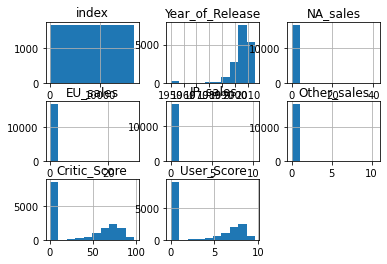

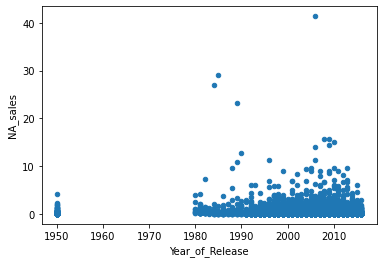

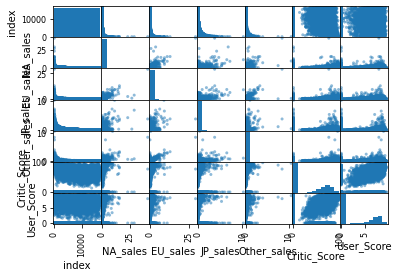

In [59]:
print(df.describe(include='all',datetime_is_numeric=True))
df.hist()
plt.show()

df.plot(x='Year_of_Release', y='NA_sales', kind='scatter')
plt.show()

pd.plotting.scatter_matrix(df)
plt.show()

    Теперь исследуем взаимосвязь между переменными с помощью оценки
коэффициента корреляции и ковариации, а также построим тепловую карту по этим значениям. В созданном заранее временном дата фрейме, удалим строки с отсутсвующими значениями оценок для лучшей оценки корелляции и ковариации. Интерпритируем результаты. По результатам ковариации можно сказать, что большинство числовых параметров изменяются в одном направлении, кроме продаж в Японии от оценок критиков и пользователей. По результатам корелляции, что самая близкая к линейной является зависимость оценок пользователей от оценок критиков. Также немалый коэффициент зависимости между собой имеют продажи в СА, Европе и остальном мире. У Японцев какой-то свой отдельный мир.
    Один столбец с целевым признаком выделить сложно, скорее можно выделить группу
атрибутов, связанных с продажами, так как главным для любого продукта является его окупаемость. Продажи, как показывает корелляция, не сильно зависит от оценок. Поэтому следует предположить, что влияют другие показатели, такие как: маркетинг, популярность серии или выпускающей корпорации, выпуск на разных платформах и т.д.

              NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
NA_sales      1.000000  0.765029  0.447927     0.637373      0.158767   
EU_sales      0.765029  1.000000  0.432168     0.721693      0.174039   
JP_sales      0.447927  0.432168  1.000000     0.287349     -0.055441   
Other_sales   0.637373  0.721693  0.287349     1.000000      0.182723   
Critic_Score  0.158767  0.174039 -0.055441     0.182723      1.000000   
User_Score    0.123352  0.132306 -0.073491     0.151047      0.901728   

              User_Score  
NA_sales        0.123352  
EU_sales        0.132306  
JP_sales       -0.073491  
Other_sales     0.151047  
Critic_Score    0.901728  
User_Score      1.000000  


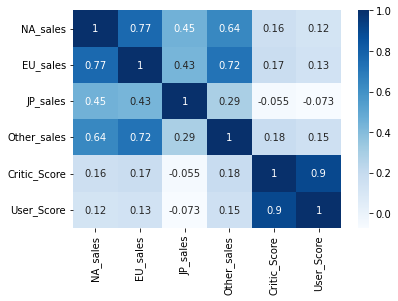

              NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
NA_sales      0.764911  0.361682  0.130141     0.111950      5.060692   
EU_sales      0.361682  0.292204  0.077606     0.078347      3.428746   
JP_sales      0.130141  0.077606  0.110357     0.019171     -0.671239   
Other_sales   0.111950  0.078347  0.019171     0.040332      1.337409   
Critic_Score  5.060692  3.428746 -0.671239     1.337409   1328.284327   
User_Score    0.401320  0.266049 -0.090819     0.112844    122.253369   

              User_Score  
NA_sales        0.401320  
EU_sales        0.266049  
JP_sales       -0.090819  
Other_sales     0.112844  
Critic_Score  122.253369  
User_Score     13.838194  


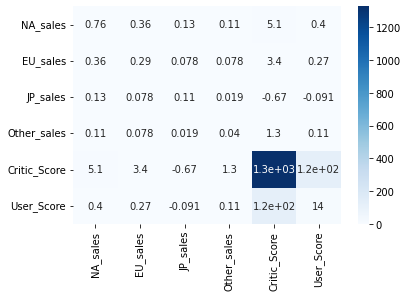

In [57]:
tmp_df = tmp_df.dropna(subset=['Critic_Score'])
tmp_df['Year_of_Release'] = pd.to_datetime(tmp_df['Year_of_Release'], format='%Y')
tmp_df['User_Score'] = pd.to_numeric(tmp_df['User_Score'], errors='coerce')
tmp_df = tmp_df.dropna(subset=['User_Score'])

corr = tmp_df.corr(method = 'pearson')
print(corr)
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

cov = tmp_df.cov()
print(cov)
sb.heatmap(cov, cmap="Blues", annot=True)
plt.show()

Вывод: Таким образом, в ходе выполнения лабораторной работы был выбран и описан выбранный датасет про продажи и оценки консольных игр, изучен 
интерфейс и возможности Jupyter Notebook, изучены базовые функции библиотеки Pandas и разработана программа, которая считывает данные, 
выводит о них информацию, удаляет дубликаты, пропуски, изменяет тип данных и создаёт сводную таблицу и графики, а также высчитывает коэффициенты корелляции и ковариации и строет тепловые карты по ним.